In [43]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
path = 'mnist.npz'
with np.load(path, allow_pickle=True) as f:
    X_train, y_train = f['x_train'], f['y_train']
    X_test, y_test = f['x_test'], f['y_test']

In [8]:
len(X_train)

60000

In [9]:
len(X_test)

10000

In [15]:
X_train[0].shape

(28, 28)

In [18]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

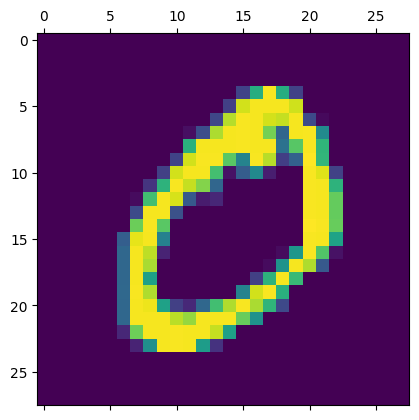

In [20]:
plt.matshow(X_train[1])

In [23]:
y_train[:2]

array([5, 0], dtype=uint8)

In [24]:
X_train.shape

(60000, 28, 28)

In [25]:
len(X_train)

60000

In [51]:
X_train = X_train / 255
X_test = X_test / 255

In [52]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [53]:
X_train_flattened[0].shape

(784,)

In [54]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8177 - loss: 0.7142
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9141 - loss: 0.3052
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9187 - loss: 0.2893
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9234 - loss: 0.2673
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9241 - loss: 0.2690


In [55]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9156 - loss: 0.3007


[0.26396042108535767, 0.9273999929428101]

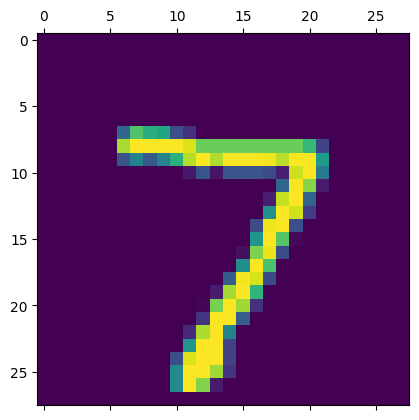

In [56]:
plt.matshow(X_test[0])

In [57]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([1.6748950e-02, 3.3973143e-07, 8.8771023e-02, 9.5832121e-01,
       2.6922915e-03, 1.2238623e-01, 1.2092705e-06, 9.9984062e-01,
       1.1219417e-01, 6.6098809e-01], dtype=float32)

In [58]:
np.argmax(y_predicted[0])

7

In [59]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [60]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    5,    9,    3,    2,    0],
       [   0, 1115,    2,    2,    0,    1,    4,    2,    9,    0],
       [   3,    9,  935,   13,    8,    4,   12,   11,   35,    2],
       [   1,    0,   22,  920,    0,   24,    3,   11,   22,    7],
       [   1,    1,    7,    1,  923,    0,    8,    4,    9,   28],
       [   7,    3,    4,   31,    9,  780,   17,    7,   28,    6],
       [   7,    3,    9,    1,    8,   11,  914,    2,    3,    0],
       [   1,    5,   25,    6,   10,    0,    0,  949,    2,   30],
       [   4,    8,    7,   18,    9,   27,    9,   11,  873,    8],
       [   9,    7,    2,    9,   31,    8,    0,   27,    8,  908]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

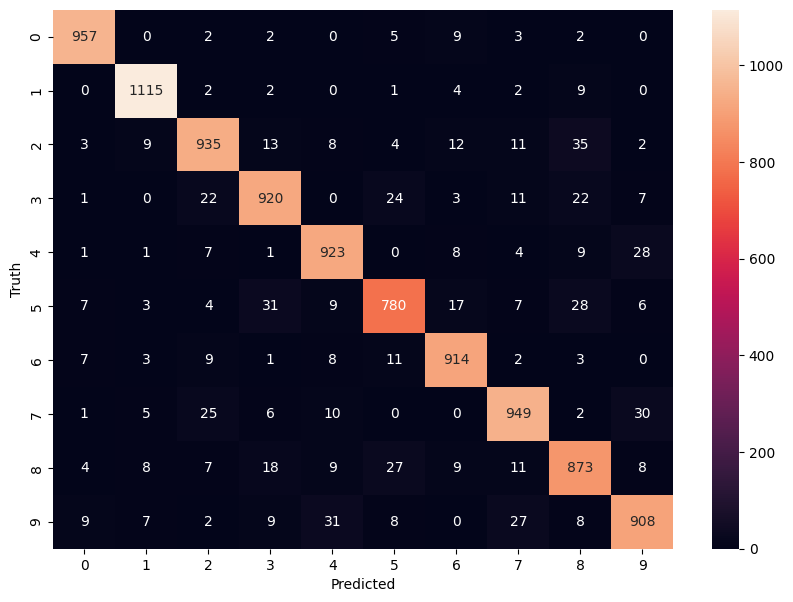

In [61]:
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
